<a href="https://colab.research.google.com/github/hsnam95/class2022Spring/blob/main/image_prorcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Step1: Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.


In [24]:
import numpy as np
import pandas as pd
import cv2 as cv # openCV package
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import urllib

##Step2: Read Image from Urls

> In this step we will read images from urls, and display them using openCV, please note the difference when reading image in RGB and BGR format. The default input color channels are in BGR format for openCV.

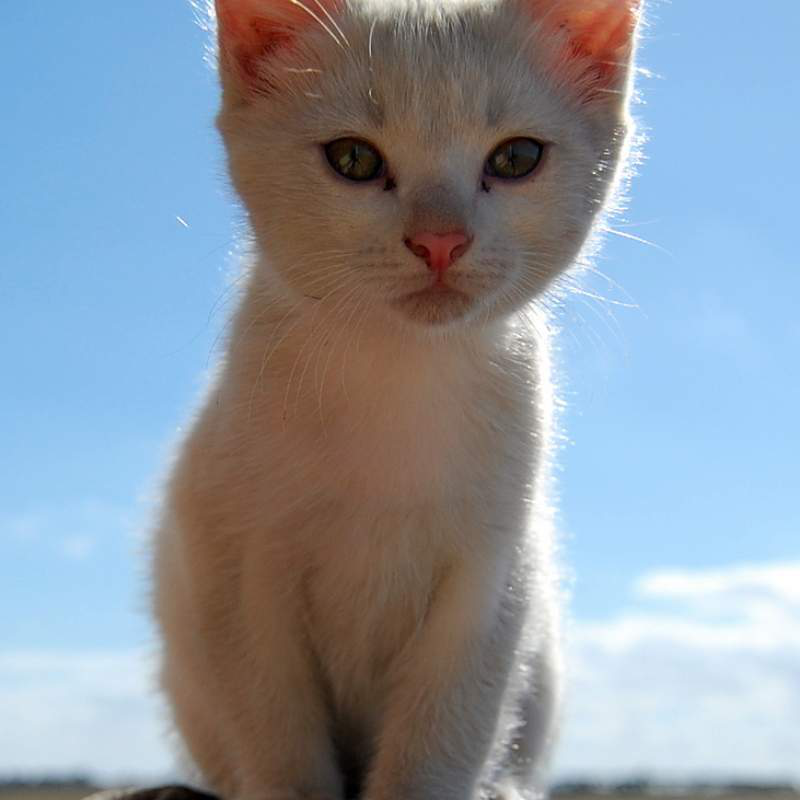

In [28]:
url = "https://placekitten.com/800"\
# cv.imread: BRG format, mpimg.imread: RGB format
image_BRG = io.imread(url)
image_RGB = cv.cvtColor(image_BRG, cv.COLOR_BGR2RGB)
image = image_RGB
cv2_imshow(image)

##Step3: Image Contours and Histograms

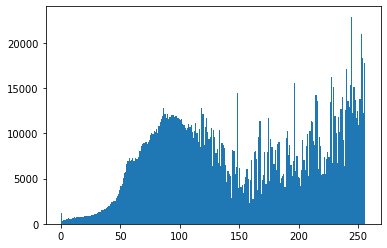

In [30]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

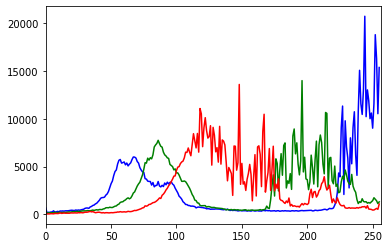

In [31]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

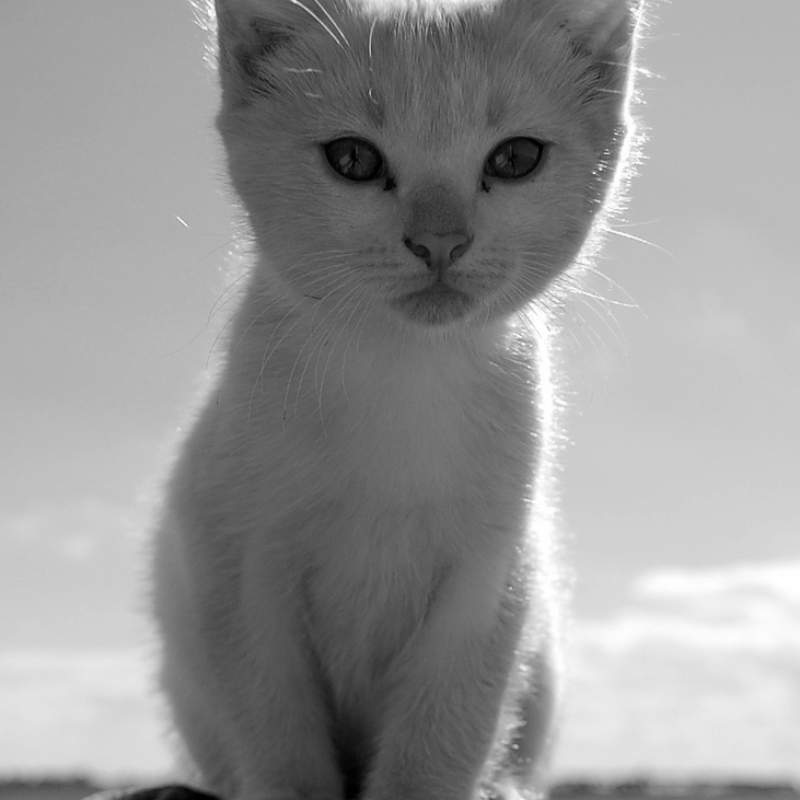

In [33]:
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

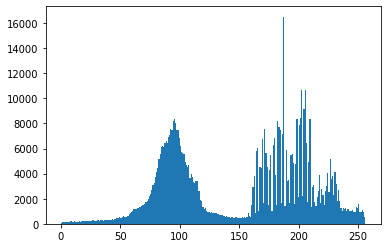

In [35]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(image_gray.ravel(),bins = 256, range = [0, 256])
plt.show()